<h1 style="text-align: center;">Medical Texts Classification<h1>

Prepare libraries

In [2]:
import nltk
from nltk.tokenize import RegexpTokenizer, TreebankWordTokenizer, TweetTokenizer, TreebankWordDetokenizer
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from nltk.stem import ISRIStemmer

import bidi
from bidi.algorithm import get_display
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from arabic_reshaper import reshape, arabic_reshaper



c:\Users\Karam_Farwan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Download data

# Question [1]: Load the data

## [1.1]

In [5]:
train = pd.read_csv("homework1_data/train.csv")
val = pd.read_csv("homework1_data/val.csv")
test = pd.read_csv("homework1_data/test.csv")


In [6]:
print(train.shape)
train.head(10)


(52758, 3)


,question,answer,label
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,الدم
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام-الخبيثة-والحميدة
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة-عامة
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض-الجهاز-التنفسي
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض-السكري
5,\nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره م...,\n\nلا يمكن الإجابة على هذا السؤال بدون فحص يج...,أمراض-الدم
6,\nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن فج...,\n\nالفحص سليم من عدا أمرين:\n١. تضخم بسيط وحم...,الغدد-الصماء
7,\nعملت عن البواسير منذ شهر وعانيت خلال التبرز ...,\n\nلا يوحد مشكلة بالمشي. الاكثار من شرب السوا...,الجهاز-التنفسي
8,\nبالله عليكم امي اجريت عملية جراحية على فخذها...,\n\nانها السيروما سائل من الانسجة بعد الجراحة ...,ارتفاع-ضغط-الدم
9,\nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة مضر...,\n\nلا ينصح بممارسة الرياضة بعد الأكل مباشرة\n...,أمراض_الغدد_الصماء


In [7]:
train = train.drop_duplicates()

train = train.dropna()

train = train.reset_index(drop=True)

print(train.shape)
train.head(10)


(32598, 3)


,question,answer,label
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,الدم
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام-الخبيثة-والحميدة
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة-عامة
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض-الجهاز-التنفسي
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض-السكري
5,\nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره م...,\n\nلا يمكن الإجابة على هذا السؤال بدون فحص يج...,أمراض-الدم
6,\nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن فج...,\n\nالفحص سليم من عدا أمرين:\n١. تضخم بسيط وحم...,الغدد-الصماء
7,\nعملت عن البواسير منذ شهر وعانيت خلال التبرز ...,\n\nلا يوحد مشكلة بالمشي. الاكثار من شرب السوا...,الجهاز-التنفسي
8,\nبالله عليكم امي اجريت عملية جراحية على فخذها...,\n\nانها السيروما سائل من الانسجة بعد الجراحة ...,ارتفاع-ضغط-الدم
9,\nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة مضر...,\n\nلا ينصح بممارسة الرياضة بعد الأكل مباشرة\n...,أمراض_الغدد_الصماء


In [8]:
print(val.shape)
val.head(10)


(17586, 3)


,question,answer,label
0,\nما هى الاعراض الاولى لمرض السكر,\n\nأعراض مرض السكر كثيره أهمها العطش كثرة ادر...,جراحة عامة
1,\nكيف يمكن علاج الناسور العصعصي بدون جراحة,\n\nعلاج الناسور العصعصي يكون بالجراحة فقط\n0\...,جراحة_العظام
2,\nماهي الاثار الجانبية لستئصال الغده الدرقيه ع...,\n\nهناك تغييرات عديدة في العمليات الحيوية لمو...,ارتفاع_ضغط_الدم
3,\nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حقت ...,\n\nيجب اتباع التعليمات الطبية و عدم وقف العلا...,امراض-الغدد-الصماء
4,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nمرحبا،\nبعد العملية، يمكن أن يحدث بعض الأع...,أمراض الجهاز التنفسي
5,\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...,\n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...,الاورام الخبيثة والحميدة
6,\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...,\n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...,جراحة_عامة
7,\nعملت اتستصال للفص الايمن من الدرقية. الحمدلل...,\n\nتورم الجرح بعد الجراحه امر طبيعى وقد يستمر...,الدم
8,\nبعد عمل تحليل للغدة الدرقية قررت الدكتورة ال...,\n\nنعم يجب تقليل الجرعة وفعلها صحيح\n1\n2021-...,امراض-الغدد-الصماء
9,\nسلام عليكم اشكرك كتير علي اهتمامك لموضوعي وا...,\n\nكما شرحت لك الخطورة تعتمد على وضع كل مريض ...,امراض-الدم


In [9]:
val = val.drop_duplicates()

val = val.dropna()

val = val.reset_index(drop=True)
print(val.shape)
val.head(10)

(11341, 3)


,question,answer,label
0,\nما هى الاعراض الاولى لمرض السكر,\n\nأعراض مرض السكر كثيره أهمها العطش كثرة ادر...,جراحة عامة
1,\nكيف يمكن علاج الناسور العصعصي بدون جراحة,\n\nعلاج الناسور العصعصي يكون بالجراحة فقط\n0\...,جراحة_العظام
2,\nماهي الاثار الجانبية لستئصال الغده الدرقيه ع...,\n\nهناك تغييرات عديدة في العمليات الحيوية لمو...,ارتفاع_ضغط_الدم
3,\nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حقت ...,\n\nيجب اتباع التعليمات الطبية و عدم وقف العلا...,امراض-الغدد-الصماء
4,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nمرحبا،\nبعد العملية، يمكن أن يحدث بعض الأع...,أمراض الجهاز التنفسي
5,\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...,\n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...,الاورام الخبيثة والحميدة
6,\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...,\n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...,جراحة_عامة
7,\nعملت اتستصال للفص الايمن من الدرقية. الحمدلل...,\n\nتورم الجرح بعد الجراحه امر طبيعى وقد يستمر...,الدم
8,\nبعد عمل تحليل للغدة الدرقية قررت الدكتورة ال...,\n\nنعم يجب تقليل الجرعة وفعلها صحيح\n1\n2021-...,امراض-الغدد-الصماء
9,\nسلام عليكم اشكرك كتير علي اهتمامك لموضوعي وا...,\n\nكما شرحت لك الخطورة تعتمد على وضع كل مريض ...,امراض-الدم


In [10]:
print(test.shape)
test.head(10)


(17586, 3)


,question,answer,label
0,\nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا ن...,\n\nاخي الكريم استخدم أقراص مضادة للالتهاب Pon...,جراحة-عامة
1,\nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه ا...,\n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ...,ارتفاع-ضغط-الدم
2,\nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساعة\...,\n\nالنتيجة طبيعية\n2\n2023-06-03 08:16:44\n\n...,امراض_الجهاز_التنفسي
3,\nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم فى...,\n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه ه...,الاورام-الخبيثة-والحميدة
4,\nقبل ثلاثة أسابيع أصبت بالتهابات القصبات الهو...,\n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض...,ارتفاع-ضغط-الدم
5,\nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتورة...,\n\nظهور السكر بالبول متوقع في الحمل الطبيعي و...,امراض الغدد الصماء
6,\nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال يخ...,\n\nالافضل مراجعة طبيبك الذي اجرى الجراحة للتق...,جراحة-عامة
7,\nكيف التوقف عن اخذ جرعات الثايروكسين ان كانت ...,\n\nممكن التوقف عنها مرة واحدة ولكن يفضل بالتن...,امراض-الغدد-الصماء
8,\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ث...,\n\nراجع جراحك ولا خوف\n0\n2023-06-05 15:01:48...,جراحة-عامة
9,\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ث...,\n\nراجع جراحك ولا خوف\n0\n2023-06-05 15:01:48...,جراحة-عامة


In [11]:
test = test.drop_duplicates()

test = test.dropna()

test = test.reset_index(drop=True)
print(test.shape)
test.head(10)

(11282, 3)


,question,answer,label
0,\nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا ن...,\n\nاخي الكريم استخدم أقراص مضادة للالتهاب Pon...,جراحة-عامة
1,\nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه ا...,\n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ...,ارتفاع-ضغط-الدم
2,\nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساعة\...,\n\nالنتيجة طبيعية\n2\n2023-06-03 08:16:44\n\n...,امراض_الجهاز_التنفسي
3,\nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم فى...,\n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه ه...,الاورام-الخبيثة-والحميدة
4,\nقبل ثلاثة أسابيع أصبت بالتهابات القصبات الهو...,\n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض...,ارتفاع-ضغط-الدم
5,\nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتورة...,\n\nظهور السكر بالبول متوقع في الحمل الطبيعي و...,امراض الغدد الصماء
6,\nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال يخ...,\n\nالافضل مراجعة طبيبك الذي اجرى الجراحة للتق...,جراحة-عامة
7,\nكيف التوقف عن اخذ جرعات الثايروكسين ان كانت ...,\n\nممكن التوقف عنها مرة واحدة ولكن يفضل بالتن...,امراض-الغدد-الصماء
8,\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ث...,\n\nراجع جراحك ولا خوف\n0\n2023-06-05 15:01:48...,جراحة-عامة
9,\nالسلام عليكم. كان عندي شرخ مزمن وفي الاسبوع ...,\n\nالالم عادي بعد الجراحة. يتحسن تدريجيا\n0\n...,جراحة-عامة


[1.2]

In [12]:

def standardize_specialization(specialization):
    cleaned_specialization = ''.join(e if e.isalnum() or e.isspace() else ' ' for e in specialization)
    return ' '.join(cleaned_specialization.split())

train['clean_label'] = train['label'].apply(standardize_specialization)
val['clean_label'] = val['label'].apply(standardize_specialization)
test['clean_label'] = test['label'].apply(standardize_specialization)

print("Unique specializations in train_data after standardization:")
print(train['clean_label'].unique())

print("\nUnique specializations in val_data after standardization:")
print(val['clean_label'].unique())

print("\nUnique specializations in test_data after standardization:")
print(test['clean_label'].unique())

Unique specializations in train_data after standardization:
['الدم' 'الاورام الخبيثة والحميدة' 'جراحة عامة' 'أمراض الجهاز التنفسي'
 'مرض السكري' 'أمراض الدم' 'الغدد الصماء' 'الجهاز التنفسي'
 'ارتفاع ضغط الدم' 'أمراض الغدد الصماء' 'جراحة العظام' 'السكري'
 'امراض الغدد الصماء' 'امراض الدم' 'امراض الجهاز التنفسي']

Unique specializations in val_data after standardization:
['جراحة عامة' 'جراحة العظام' 'ارتفاع ضغط الدم' 'امراض الغدد الصماء'
 'أمراض الجهاز التنفسي' 'الاورام الخبيثة والحميدة' 'الدم' 'امراض الدم'
 'امراض الجهاز التنفسي' 'مرض السكري' 'الغدد الصماء' 'أمراض الغدد الصماء'
 'السكري' 'الجهاز التنفسي' 'أمراض الدم']

Unique specializations in test_data after standardization:
['جراحة عامة' 'ارتفاع ضغط الدم' 'امراض الجهاز التنفسي'
 'الاورام الخبيثة والحميدة' 'امراض الغدد الصماء' 'مرض السكري' 'امراض الدم'
 'جراحة العظام' 'السكري' 'أمراض الجهاز التنفسي' 'الجهاز التنفسي'
 'أمراض الدم' 'الدم' 'الغدد الصماء' 'أمراض الغدد الصماء']


In [13]:
import nltk
from nltk.stem import ISRIStemmer

nltk.download('arabic')

stemmer = ISRIStemmer()

train['clean_label'] = train['clean_label'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
val['clean_label'] = val['clean_label'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
test['clean_label'] = test['clean_label'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

print(train['clean_label'].unique())
print(val['clean_label'].unique())
print(test['clean_label'].unique())


[nltk_data] Error loading arabic: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['لدم' 'ورم خبث حمد' 'جرح عمة' 'مرض جهز نفس' 'مرض سكر' 'مرض لدم' 'غدد صمء'
 'جهز نفس' 'رفع ضغط لدم' 'مرض غدد صمء' 'جرح عظم' 'سكر']
['جرح عمة' 'جرح عظم' 'رفع ضغط لدم' 'مرض غدد صمء' 'مرض جهز نفس'
 'ورم خبث حمد' 'لدم' 'مرض لدم' 'مرض سكر' 'غدد صمء' 'سكر' 'جهز نفس']
['جرح عمة' 'رفع ضغط لدم' 'مرض جهز نفس' 'ورم خبث حمد' 'مرض غدد صمء'
 'مرض سكر' 'مرض لدم' 'جرح عظم' 'سكر' 'جهز نفس' 'لدم' 'غدد صمء']


In [14]:



pattern_spe = { 'جهز نفس':'مرض جهز نفس',
               'سكر':'مرض سكر',
               'لدم':'مرض لدم',
               'غدد صمء':'مرض غدد صمء'
               }

for spe, pattern in pattern_spe.items():
    train['clean_label'] = train['clean_label'].apply(lambda x:spe if re.search(pattern, str(x), re.IGNORECASE) else x)
    test['clean_label'] = test['clean_label'].apply(lambda x:spe if re.search(pattern, str(x), re.IGNORECASE) else x)
    val['clean_label'] = val['clean_label'].apply(lambda x:spe if re.search(pattern, str(x), re.IGNORECASE) else x)

print(train['clean_label'].unique())
print(val['clean_label'].unique())
print(test['clean_label'].unique())



['لدم' 'ورم خبث حمد' 'جرح عمة' 'جهز نفس' 'سكر' 'غدد صمء' 'رفع ضغط لدم'
 'جرح عظم']
['جرح عمة' 'جرح عظم' 'رفع ضغط لدم' 'غدد صمء' 'جهز نفس' 'ورم خبث حمد' 'لدم'
 'سكر']
['جرح عمة' 'رفع ضغط لدم' 'جهز نفس' 'ورم خبث حمد' 'غدد صمء' 'سكر' 'لدم'
 'جرح عظم']


In [15]:
train.head(10)

,question,answer,label,clean_label
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,الدم,لدم
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام-الخبيثة-والحميدة,ورم خبث حمد
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة-عامة,جرح عمة
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض-الجهاز-التنفسي,جهز نفس
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض-السكري,سكر
5,\nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره م...,\n\nلا يمكن الإجابة على هذا السؤال بدون فحص يج...,أمراض-الدم,لدم
6,\nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن فج...,\n\nالفحص سليم من عدا أمرين:\n١. تضخم بسيط وحم...,الغدد-الصماء,غدد صمء
7,\nعملت عن البواسير منذ شهر وعانيت خلال التبرز ...,\n\nلا يوحد مشكلة بالمشي. الاكثار من شرب السوا...,الجهاز-التنفسي,جهز نفس
8,\nبالله عليكم امي اجريت عملية جراحية على فخذها...,\n\nانها السيروما سائل من الانسجة بعد الجراحة ...,ارتفاع-ضغط-الدم,رفع ضغط لدم
9,\nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة مضر...,\n\nلا ينصح بممارسة الرياضة بعد الأكل مباشرة\n...,أمراض_الغدد_الصماء,غدد صمء


In [16]:
val.head(10)

,question,answer,label,clean_label
0,\nما هى الاعراض الاولى لمرض السكر,\n\nأعراض مرض السكر كثيره أهمها العطش كثرة ادر...,جراحة عامة,جرح عمة
1,\nكيف يمكن علاج الناسور العصعصي بدون جراحة,\n\nعلاج الناسور العصعصي يكون بالجراحة فقط\n0\...,جراحة_العظام,جرح عظم
2,\nماهي الاثار الجانبية لستئصال الغده الدرقيه ع...,\n\nهناك تغييرات عديدة في العمليات الحيوية لمو...,ارتفاع_ضغط_الدم,رفع ضغط لدم
3,\nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حقت ...,\n\nيجب اتباع التعليمات الطبية و عدم وقف العلا...,امراض-الغدد-الصماء,غدد صمء
4,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nمرحبا،\nبعد العملية، يمكن أن يحدث بعض الأع...,أمراض الجهاز التنفسي,جهز نفس
5,\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...,\n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...,الاورام الخبيثة والحميدة,ورم خبث حمد
6,\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...,\n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...,جراحة_عامة,جرح عمة
7,\nعملت اتستصال للفص الايمن من الدرقية. الحمدلل...,\n\nتورم الجرح بعد الجراحه امر طبيعى وقد يستمر...,الدم,لدم
8,\nبعد عمل تحليل للغدة الدرقية قررت الدكتورة ال...,\n\nنعم يجب تقليل الجرعة وفعلها صحيح\n1\n2021-...,امراض-الغدد-الصماء,غدد صمء
9,\nسلام عليكم اشكرك كتير علي اهتمامك لموضوعي وا...,\n\nكما شرحت لك الخطورة تعتمد على وضع كل مريض ...,امراض-الدم,لدم


In [17]:
test.head(10)

,question,answer,label,clean_label
0,\nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا ن...,\n\nاخي الكريم استخدم أقراص مضادة للالتهاب Pon...,جراحة-عامة,جرح عمة
1,\nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه ا...,\n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ...,ارتفاع-ضغط-الدم,رفع ضغط لدم
2,\nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساعة\...,\n\nالنتيجة طبيعية\n2\n2023-06-03 08:16:44\n\n...,امراض_الجهاز_التنفسي,جهز نفس
3,\nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم فى...,\n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه ه...,الاورام-الخبيثة-والحميدة,ورم خبث حمد
4,\nقبل ثلاثة أسابيع أصبت بالتهابات القصبات الهو...,\n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض...,ارتفاع-ضغط-الدم,رفع ضغط لدم
5,\nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتورة...,\n\nظهور السكر بالبول متوقع في الحمل الطبيعي و...,امراض الغدد الصماء,غدد صمء
6,\nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال يخ...,\n\nالافضل مراجعة طبيبك الذي اجرى الجراحة للتق...,جراحة-عامة,جرح عمة
7,\nكيف التوقف عن اخذ جرعات الثايروكسين ان كانت ...,\n\nممكن التوقف عنها مرة واحدة ولكن يفضل بالتن...,امراض-الغدد-الصماء,غدد صمء
8,\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ث...,\n\nراجع جراحك ولا خوف\n0\n2023-06-05 15:01:48...,جراحة-عامة,جرح عمة
9,\nالسلام عليكم. كان عندي شرخ مزمن وفي الاسبوع ...,\n\nالالم عادي بعد الجراحة. يتحسن تدريجيا\n0\n...,جراحة-عامة,جرح عمة


# Question [2]: Text Analysis

## [2.1]


In [18]:
label_counts = train['clean_label'].value_counts()
print(label_counts)

ورم خبث حمد    6449
جرح عمة        6307
غدد صمء        5752
سكر            4268
جهز نفس        3676
رفع ضغط لدم    2537
جرح عظم        2211
لدم            1398
Name: clean_label, dtype: int64


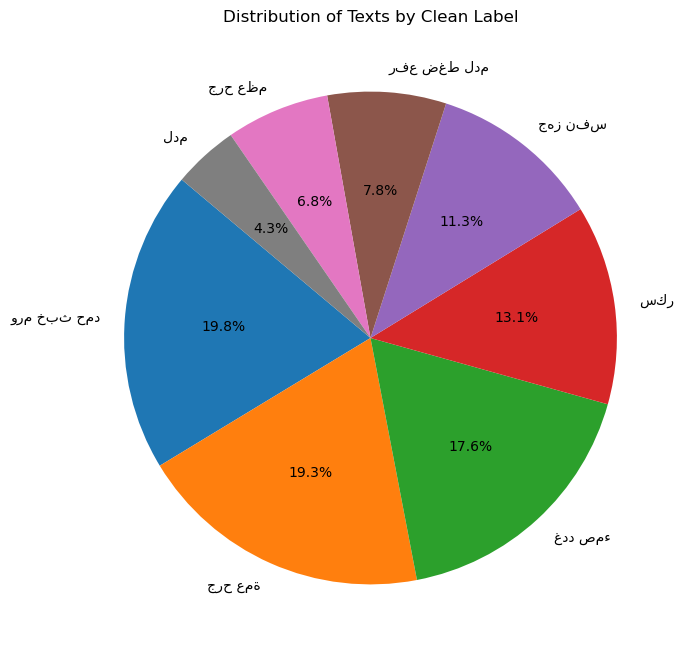

In [19]:

plt.figure(figsize=(10, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Texts by Clean Label')
plt.show()

## [2.2]

In [20]:
def tokenize_text(text):

    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)

    return tokens

train['tokenized_text'] = train['question'].apply(tokenize_text) + train['answer'].apply(tokenize_text)


In [21]:
print(train['tokenized_text'][:5])
for index, row in train.head(5).iterrows():
    print(f"Tokenized Text: {row['tokenized_text']}")
    print("\n")

total_tokens = train['tokenized_text'].apply(len).sum()

unique_vocab = set(word for tokens in train['tokenized_text'] for word in tokens)
vocab_size = len(unique_vocab)
print(f"عدد الكلمات الكلي: {total_tokens}")
print(f"عدد الكلمات الفريدة الكلي: {vocab_size}")
train.head()

0    [ما, هي, مميزات, و, عيوب, الدواء, جلوكوفانس, 5...
1    [اليك, نتيجة, تحليل, هرمونات, الغدة, الدرقية, ...
2    [حلول, منزلية, لأعراض, ارتفاع, ضغط, الدم, يفضل...
3    [عملت, عملية, دوالي, الساقين, قسطرة, الليزر, م...
4    [ما, حقيقة, ان, تمرين, العضلة, النعلية, يخفض, ...
Name: tokenized_text, dtype: object
Tokenized Text: ['ما', 'هي', 'مميزات', 'و', 'عيوب', 'الدواء', 'جلوكوفانس', '500', '5', 'و', 'ايضا', 'الأنسولين', 'مكس', 'تارد', '30', 'لكل', 'علاج', 'ايجابيته', 'وسلبياته', 'والتي', 'تعتمد', 'على', 'حالة', 'المريض', 'فما', 'قد', 'يناسب', 'احدهم', 'قد', 'لا', 'يناسب', 'الاخر', 'وهذا', 'يحدده', 'الطبيب', 'خلال', 'مراجعة', 'المريض', 'له', '1', '2015-01-', '04', '20:08', ':', '51', 'الدكتور', 'يزن', 'علي', 'خليف', '/', 'اسئلة-طبية', '/', 'مرض-السكري', '/', 'ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين', '-', '351157', 'الدكتور', 'يزن', 'علي', 'خليف', 'الغدد', 'الصماء']


Tokenized Text: ['اليك', 'نتيجة', 'تحليل', 'هرمونات', 'الغدة', 'الدرقية', 'علما', 'بانه', 'تم', 'استأصال',

,question,answer,label,clean_label,tokenized_text
0,\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...,\n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...,الدم,لدم,"[ما, هي, مميزات, و, عيوب, الدواء, جلوكوفانس, 5..."
1,\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...,\n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...,الاورام-الخبيثة-والحميدة,ورم خبث حمد,"[اليك, نتيجة, تحليل, هرمونات, الغدة, الدرقية, ..."
2,\nحلول منزلية لأعراض ارتفاع ضغط الدم,\n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...,جراحة-عامة,جرح عمة,"[حلول, منزلية, لأعراض, ارتفاع, ضغط, الدم, يفضل..."
3,\nعملت عملية دوالي الساقين قسطرة الليزر من شهر...,\n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...,أمراض-الجهاز-التنفسي,جهز نفس,"[عملت, عملية, دوالي, الساقين, قسطرة, الليزر, م..."
4,\nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...,\n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....,مرض-السكري,سكر,"[ما, حقيقة, ان, تمرين, العضلة, النعلية, يخفض, ..."


## [2.3]

In [22]:
all_words = [word for tokens in train['tokenized_text'] for word in tokens]

all_words_text = ' '.join(all_words)

text = arabic_reshaper.reshape(all_words_text)
text = get_display(text)


KeyboardInterrupt: 

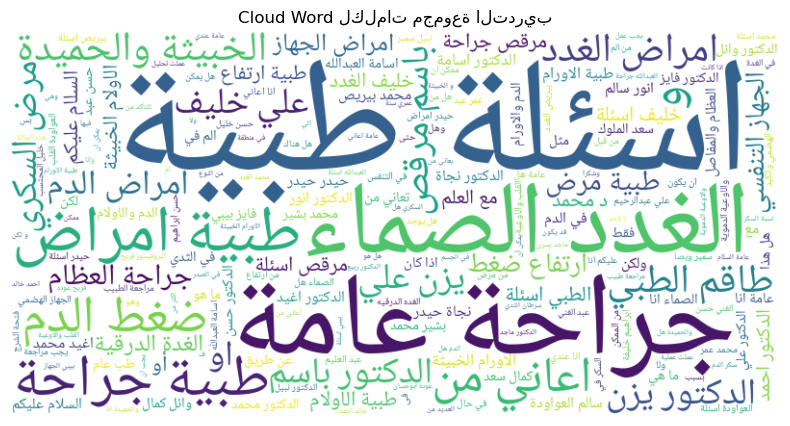

In [ ]:

font_path = 'C:/Users/Karam_Farwan/Desktop/NLP/عملي/Homework 1/static/NotoNaskhArabic-Regular.ttf'
wordcloud = WordCloud(font_path, width=800, height=400, background_color='white').generate(text)
wordcloud.to_file("arabic_example.png")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cloud Word لكلمات مجموعة التدريب')
plt.show()


#الصورة واضحة عند التنفيذ على vc code

## [2.4]

In [ ]:
from nltk import FreqDist
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder

nltk.download('stopwords')

def analyze_text(tokenized_text_test):
    freq_dist = FreqDist(tokenized_text_test)

    hapaxes = freq_dist.hapaxes()

    most_common_words = freq_dist.most_common(15)

    least_common_words = freq_dist.most_common()[:-11:-1]

    bigrams = list(nltk.bigrams(tokenized_text_test))
    bigram_freq_dist = FreqDist(bigrams)
    most_common_bigrams = bigram_freq_dist.most_common(10)

    trigrams = list(nltk.trigrams(tokenized_text_test))
    trigram_freq_dist = FreqDist(trigrams)
    most_common_trigrams = trigram_freq_dist.most_common(10)

    bigram_collocation_finder = BigramCollocationFinder.from_words(tokenized_text_test)
    most_common_collocations_bigram = bigram_collocation_finder.nbest(nltk.collocations.BigramAssocMeasures.likelihood_ratio, 10)

    trigram_collocation_finder = TrigramCollocationFinder.from_words(tokenized_text_test)
    most_common_collocations_trigram = trigram_collocation_finder.nbest(nltk.collocations.TrigramAssocMeasures.likelihood_ratio, 10)

    return {
        "hapaxes": hapaxes,
        "most_common_words": most_common_words,
        "least_common_words": least_common_words,
        "most_common_bigrams": most_common_bigrams,
        "most_common_trigrams": most_common_trigrams,
        "most_common_collocations_bigram": most_common_collocations_bigram,
        "most_common_collocations_trigram": most_common_collocations_trigram
    }

tokenized_text_test = train['tokenized_text'][0]
analysis_result = analyze_text(tokenized_text_test)

for key, value in analysis_result.items():
    print(f"\n{key}:\n{value}")


In [ ]:
tokenized_text = train['tokenized_text']
analysis_result = analyze_text(all_words)

for key, value in analysis_result.items():
    print(f"\n{key}:\n{value}")

In [ ]:


def analyze_text_by_label(data, label):
    label_data = data[data['clean_label'] == label]
    tokenized_text = [word for tokens in label_data['tokenized_text'] for word in tokens]
    return analyze_text(tokenized_text)

unique_labels = train['clean_label'].unique()

results_by_label = {}

for label in unique_labels:
    results_by_label[label] = analyze_text_by_label(train, label)

for label, results in results_by_label.items():
    print(f"\nResults for Label: {label}")
    for key, value in results.items():
        print(f"\n{key}:\n{value}")


In [ ]:
train.head(10)

## [2.5]

In [ ]:
import matplotlib.pyplot as plt

train['unique_vocab_length'] = train['tokenized_text'].apply(lambda x: len(set(x)))
train.head(10)


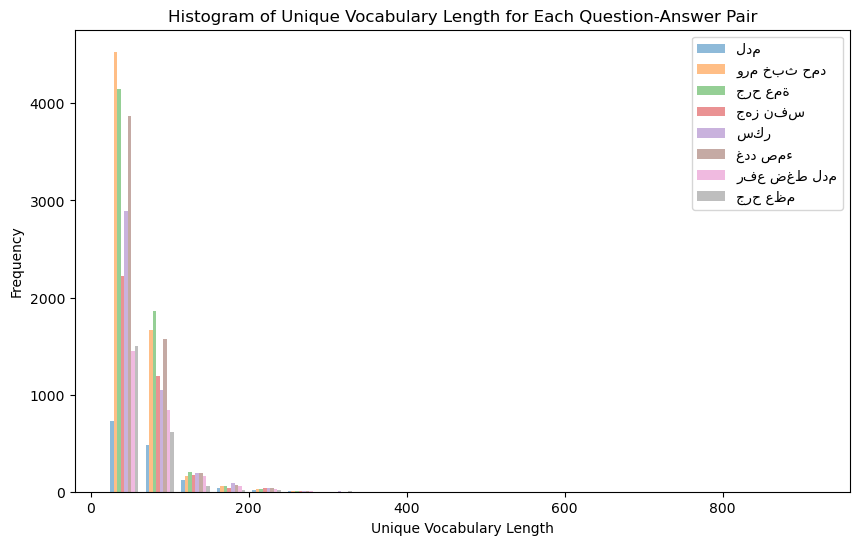

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist([train[train['clean_label'] == label]['unique_vocab_length'] for label in unique_labels],
         bins=20, alpha=0.5, label=unique_labels)
plt.xlabel('Unique Vocabulary Length')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Vocabulary Length for Each Question-Answer Pair')
plt.legend(loc='upper right')
plt.show()


# تم استخدام اللغة الانكليزية في العرض بسبب الخلل في عرض اللغة العربية


In [ ]:

unique_clean_labels = train['clean_label'].unique()

for clean_label in unique_clean_labels:
    plt.figure(figsize=(10, 6))
    plt.hist(train[train['clean_label'] == clean_label]['unique_vocab_length'],
             bins=20, alpha=0.5, label=f'{clean_label}')
    plt.xlabel('Unique Vocabulary Length')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Unique Vocabulary Length for Each Question-Answer Pair ({clean_label})')
    plt.legend(loc='upper right')
    plt.show()


# Question [3]: Text Cleaning and Normalization

## [3.1]


In [23]:
def remove_links(text):
    link_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|http[s]?://(?:[^\s\u0621-\u063A\u0641-\u064A\u0660-\u0669\u0671-\u06D3\u06D5\u06E5-\u06ED])+'
    text_without_links = re.sub(link_pattern, '', text)
    return text_without_links

for i in range(5):
    sample_text = train['question'][i] + ' ' + train['answer'][i]  # Combine question and answer
    processed_text = remove_links(sample_text)
    print(f"Original Text: {sample_text}\nProcessed Text: {processed_text}\n{'='*50}")


Original Text: 
ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Processed Text: 
ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30  

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 
اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة  

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغ

## [3.2]

In [24]:
def remove_doctor_names(text):
    doctor_pattern = r'(الدكتور|الدكتورة|دكتورة|دكتور|د\.)\s+(\w+)\s+\w+(\s*)\s+(\w+)'
    text_without_doctors = re.sub(doctor_pattern, r'د.\2', text)
    return text_without_doctors

for i in range(5):
    sample_text = train['answer'][i+10]
    processed_text = remove_doctor_names(sample_text)
    print(f"Original Text: {sample_text}\nProcessed Text: {processed_text}\n{'='*50}")


Original Text: 

مرهم تيراميسين. للعين فقط
0
2023-05-24 19:02:57


الدكتور رفيق عبده جعفر







/اسئلة-طبية/جراحة-عامة/لدي-جرح-فوق-حاجبي-و-تمت-عملية-الخياطة-ثم-نزع-الغرزات-1707310

الدكتور رفيق عبده جعفر 


جراحة عامة 



Processed Text: 

مرهم تيراميسين. للعين فقط
0
2023-05-24 19:02:57


د.رفيق







/اسئلة-طبية/جراحة-عامة/لدي-جرح-فوق-حاجبي-و-تمت-عملية-الخياطة-ثم-نزع-الغرزات-1707310

د.رفيق 


جراحة عامة 



Original Text: 

طالما الورم فى الابط فقط ممكن ازالته اما لو انتشر فالعلاج كيماوى
1
2021-03-25 09:45:38


د. محمد عماد الزكي







/اسئلة-طبية/الاورام-الخبيثة-والحميدة/اعاني-سابقنامن-ورم-خبيث-في-الثدي-والان-راجع-الورم-في-1505440

د. محمد عماد الزكي 


امراض الدم والاورام 



Processed Text: 

طالما الورم فى الابط فقط ممكن ازالته اما لو انتشر فالعلاج كيماوى
1
2021-03-25 09:45:38


د.محمد







/اسئلة-طبية/الاورام-الخبيثة-والحميدة/اعاني-سابقنامن-ورم-خبيث-في-الثدي-والان-راجع-الورم-في-1505440

د.محمد 


امراض الدم والاورام 



Original Text: 

الرد النموذجى صعب تحقيقه لكن على الأق

## [3.3]

In [25]:

def remove_specialization(text):
    # نمط التعبير النظامي لحذف اختصاص الطبيب
    specialization_pattern = r'(د[.]\s*\w+)\s*([^\n]+)?'

    # حذف اختصاص الطبيب من النص
    text = re.sub(specialization_pattern, '', text)

    return text

for i in range(5):
    sample_text = train['answer'][i+10]
    processed_text = remove_doctor_names(sample_text)
    print(f"Original Text: {sample_text}\nProcessed Text: {processed_text}\n{'='*50}")


Original Text: 

مرهم تيراميسين. للعين فقط
0
2023-05-24 19:02:57


الدكتور رفيق عبده جعفر







/اسئلة-طبية/جراحة-عامة/لدي-جرح-فوق-حاجبي-و-تمت-عملية-الخياطة-ثم-نزع-الغرزات-1707310

الدكتور رفيق عبده جعفر 


جراحة عامة 



Processed Text: 

مرهم تيراميسين. للعين فقط
0
2023-05-24 19:02:57


د.رفيق







/اسئلة-طبية/جراحة-عامة/لدي-جرح-فوق-حاجبي-و-تمت-عملية-الخياطة-ثم-نزع-الغرزات-1707310

د.رفيق 


جراحة عامة 



Original Text: 

طالما الورم فى الابط فقط ممكن ازالته اما لو انتشر فالعلاج كيماوى
1
2021-03-25 09:45:38


د. محمد عماد الزكي







/اسئلة-طبية/الاورام-الخبيثة-والحميدة/اعاني-سابقنامن-ورم-خبيث-في-الثدي-والان-راجع-الورم-في-1505440

د. محمد عماد الزكي 


امراض الدم والاورام 



Processed Text: 

طالما الورم فى الابط فقط ممكن ازالته اما لو انتشر فالعلاج كيماوى
1
2021-03-25 09:45:38


د.محمد







/اسئلة-طبية/الاورام-الخبيثة-والحميدة/اعاني-سابقنامن-ورم-خبيث-في-الثدي-والان-راجع-الورم-في-1505440

د.محمد 


امراض الدم والاورام 



Original Text: 

الرد النموذجى صعب تحقيقه لكن على الأق

## [3.4]

In [26]:
def remove_duplicate_characters(text):
    repeated_chars_pattern = re.compile(r'([ء-ي])\1{2,}')
    cleaned_text = re.sub(r'[^\w\s]', ' ', text)
    cleaned_text = repeated_chars_pattern.sub(r'\1', cleaned_text)
    return cleaned_text
cleaned_text1=remove_duplicate_characters("الليل يااااا ...... ليلى يعاااااتبني")
print(cleaned_text1)
for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = remove_duplicate_characters(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")


الليل يا        ليلى يعاتبني
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015 01 04 20 08 51


الدكتور يزن علي خليف







 اسئلة طبية مرض السكري ما هي مميزات و عيوب الدواء جلوكوفانس و ايضا الانسولين 351157

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: 

نعم  يجب تخفيض الجرعة  الا اذا كان سبب اس

## [3.5]

### [3.5.1]

In [27]:
def convert_indic_digits_to_arabic(text):
    indic_to_arabic_mapping = {
        '٠': '0', '١': '1', '٢': '2', '٣': '3', '٤': '4',
        '٥': '5', '٦': '6', '٧': '7', '٨': '8', '٩': '9'
    }

    pattern = re.compile('|'.join(map(re.escape, indic_to_arabic_mapping.keys())))
    arabic_text = pattern.sub(lambda match: indic_to_arabic_mapping[match.group()], text)

    return arabic_text

# مثال على الاستخدام
indic_text = "الأرقام الهندية: ١ ٢ ٣ ٤ ٥"
arabic_text = convert_indic_digits_to_arabic(indic_text)
print(arabic_text)

for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = convert_indic_digits_to_arabic(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")

الأرقام الهندية: 1 2 3 4 5
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئ

### [3.5.2]

In [28]:

def unify_numbers(text):
    pattern = re.compile(r'\d')
    unified_text = pattern.sub("*" , text)
    return unified_text

text = "123 و ١٤٥ و ٧٨٩"
unified_text = unify_numbers(text)
print(unified_text)

for i in range(5):
    sample_text = train['answer'][i]

    cleaned_text = unify_numbers(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")


*** و *** و ***
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
*
****-**-** **:**:**


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-******

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة ه

### [3.5.3]

In [29]:
def remove_numbers(text):
    pattern = re.compile(r'\d')
    text_without_numbers = pattern.sub('', text)
    return text_without_numbers

text = "123 تجربة 456 لحذف الأرقام 789"
text_without_numbers = remove_numbers(text)
print(text_without_numbers)

for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = remove_numbers(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")


 تجربة  لحذف الأرقام 
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له

-- ::


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة



### [3.5.4]

In [30]:
def remove_date_time(text):
    date_time_pattern = re.compile(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}')
    cleaned_text = date_time_pattern.sub('', text)
    return cleaned_text

text = "تم إجراء العملية في 2022-11-30 15:30:00 بنجاح"
text_without_date_time = remove_date_time(text)
print(text_without_date_time)

for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = remove_date_time(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")


تم إجراء العملية في  بنجاح
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1



الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان 

## [3.6]

### [3.6.1]

In [31]:
def remove_punctuation(text):
    cleaned_text = re.sub(r'[^\w\s]', ' ', text)
    return cleaned_text

text = "السلام عليكم!كيف-حالكم؟   اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين"
cleaned_text = remove_punctuation(text)
print(cleaned_text)

for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = remove_punctuation(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")

السلام عليكم كيف حالكم    اسئلة طبية مرض السكري ما هي مميزات و عيوب الدواء جلوكوفانس و ايضا الانسولين
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015 01 04 20 08 51


الدكتور يزن علي خليف







 اسئلة طبية مرض السكري ما هي مميزات و عيوب الدواء جلوكوفانس و ايضا الانسولين 351157

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 



### [3.6.2]

In [32]:
def remove_non_arabic(text):
    arabic_pattern = re.compile(r'[^\u0600-\u06FF 0-9\s,.!?؟]+')
    cleaned_text = arabic_pattern.sub(' ', text)
    return cleaned_text

text = "Hello, مرحباً---- بكم في ///! 123"
cleaned_text = remove_non_arabic(text)
print(cleaned_text)
for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = remove_non_arabic(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")

 , مرحباً  بكم في  ! 123
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015 01 04 20 08 51


الدكتور يزن علي خليف







 اسئلة طبية مرض السكري ما هي مميزات و عيوب الدواء جلوكوفانس و ايضا الانسولين 351157

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصا

## [3.7]

In [33]:
import nltk

nltk.download('punkt')


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [34]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords_and_duplicates(text):
    stop_words = set(stopwords.words('arabic'))  # قائمة كلمات التوقف باللغة العربية
    words = nltk.word_tokenize(text)

    filtered_words = [word for word in words if word.lower() not in stop_words and words.count(word) == 1]

    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

text = "إقرأ المزيد المزيد  ، أرجو الرد، إقرأ المزيد"
cleaned_text = remove_stopwords_and_duplicates(text)
print(cleaned_text)

for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = remove_stopwords_and_duplicates(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")

، أرجو الرد،
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: لكل علاج ايجابيته وسلبياته والتي تعتمد حالة فما احدهم الاخر وهذا يحدده الطبيب خلال مراجعة 1 2015-01-04 20:08:51 /اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157 الغدد الصماء
Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: . يجب تخفيض الجرعة، الا اذا سبب استئصال سرطان 0 2017-02-13 06:34:19 /اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154 جراح

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


## [3.8]

In [35]:
from nltk.stem import ISRIStemmer

def arabic_stemming(text):
    isri_stemmer = ISRIStemmer()
    stemmed_words = [isri_stemmer.stem(word) for word in text.split()]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

text = "الكلمات العربية يمكن أن تكون معقدة"
stemmed_text = arabic_stemming(text)
print(stemmed_text)
for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = arabic_stemming(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")

كلم عرب يمكن ان تكون عقد
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: لكل علج ايجابيته وسلبياته والتي عمد على حلة ريض فما قد نسب احد قد لا نسب اخر وهذا حدد طبب خلل رجع ريض له 1 2015-01-04 20:08:51 دكتور يزن علي خلف /اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157 دكتور يزن علي خلف غدد صمء
Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: عم. يجب خفض جرعة، الا اذا كان سبب ئصل غدة هو سرط غدة 0 2017-02-13 06:34:19 دكتور بسم رقص /اسئلة-طبية/امر

## [3.9]

### [3.9.1]

In [37]:
def standardize_hamzat(text):
    standardized_text = re.sub('[ؤئ]', 'ء', text)
    return standardized_text

text = "الكلمات العربية يمكن أن تكون معقدة ؤؤؤؤ  ئئئئ "
standardized_text = standardize_hamzat(text)
print(standardized_text)

for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = standardize_hamzat(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")

الكلمات العربية يمكن أن تكون معقدة ءءءء  ءءءء 
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسءلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: 

نعم. يجب تخفيض الجرعة، 

### [3.9.2]

In [38]:
import re

def standardize_alifat(text):
    # تحويل الألفات (أ آ إ) إلى ألف عادية (ا)
    standardized_text = re.sub('[أآإ]', 'ا', text)
    return standardized_text

text = "الألفات تظهر كـ أ آ إ"
standardized_text = standardize_alifat(text)
print(standardized_text)


for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = standardize_alifat(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")

الالفات تظهر كـ ا ا ا
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال ا

### [3.9.3]

In [39]:

def remove_tatweel(text):
    cleaned_text = re.sub('ـ+', '', text)
    return cleaned_text

text = "التطــــــــــــــــــــــــويل يظهر هنا"
cleaned_text = remove_tatweel(text)
print(cleaned_text)

for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = remove_tatweel(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")


التطويل يظهر هنا
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة 

### [3.9.4]

In [40]:
def remove_diacritics(text):
    diacritics_pattern = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    cleaned_text = re.sub(diacritics_pattern, '', text)
    return cleaned_text

text = "يُشار إِلَى أَنَّ اللُّغَةَ العَرَبيَّةِ يَتَحَدَّثَها أَكْثَرَ مِنْ 422 مِلْيونَ نَسَمَةٍ"
cleaned_text = remove_diacritics(text)
print(cleaned_text)

for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = remove_diacritics(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")


يشار إلى أن اللغة العربية يتحدثها أكثر من 422 مليون نسمة
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: 

نعم. يجب تخفي

## [3.10]

In [41]:
def remove_duplicate_spaces(text):
    cleaned_text = re.sub(r'\s+', ' ', text)
    return cleaned_text.strip()



text = "النص مع فراغات مكررة    بين    الكلمات."
cleaned_text = remove_duplicate_spaces(text)
print(cleaned_text)

for i in range(5):
    sample_text = train['answer'][i]
    cleaned_text = remove_duplicate_spaces(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")


النص مع فراغات مكررة بين الكلمات.
Original Text: 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له 1 2015-01-04 20:08:51 الدكتور يزن علي خليف /اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157 الدكتور يزن علي خليف الغدد الصماء
Original Text: 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو س

## Extra [3.11]

In [46]:
functions_list = [
        remove_links,
        remove_doctor_names,
        remove_specialization,
        remove_duplicate_characters,
        convert_indic_digits_to_arabic,
        unify_numbers,
        remove_numbers,
        remove_date_time,
        remove_punctuation,
        remove_non_arabic,
        remove_stopwords_and_duplicates,
        arabic_stemming,
        standardize_hamzat,
        standardize_alifat,
        remove_tatweel,
        remove_diacritics,
        remove_duplicate_spaces,
    ]


name_list=[
    'ljxnlxnj',
    'ccccccc',
    'kdvnlkdsnv',
    'kzndvl'
]
for function in name_list:
    print(function)

ljxnlxnj
ccccccc
kdvnlkdsnv
kzndvl


# Question [4]: Prepare Training Data

## [4.1]


In [73]:
def process_text_pipeline(text):
    # قائمة التوابع المعالجة
    functions_list = [
        remove_links,
        remove_doctor_names,
        remove_specialization,
        remove_duplicate_characters,
        convert_indic_digits_to_arabic,
        unify_numbers,
        remove_numbers,
        remove_date_time,
        remove_punctuation,
        remove_non_arabic,
        remove_stopwords_and_duplicates,
        arabic_stemming,
        standardize_hamzat,
        standardize_alifat,
        remove_tatweel,
        remove_diacritics,
        remove_duplicate_spaces
    ]

    # تنفيذ التوابع بالترتيب
    processed_text = text
    for function in functions_list:
        processed_text = function(processed_text)

    return processed_text

for i in range(5):
    sample_text =  train['question'][i] + train['answer'][i]
    cleaned_text = process_text_pipeline(sample_text)
    print(f"Original Text: {sample_text}\nCleaned Text: {cleaned_text}\n{'='*50}")



Original Text: 
ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30 

لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 



Cleaned Text: ميز عيب دوء جلوكوفانس ايض سول مكس ترد لكل علج ايجابيته وسلبياته والتي عمد حلة فما احد اخر وهذا حدد طبب خلل رجع
Original Text: 
اليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة 

نعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة
0
2017-02-13 06:34:19


الدكتور باسم مرقص







/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154

الدكتور باسم مرقص 


جراحة عامة 



Cleaned Text: اصل كثر سنت طلب عدل يجب خفض الا اذا سبب ءصل سرط دكتور بسم رقص سءل طبة م

## [4.2]

In [ ]:
train['cleaned_text'] = train.apply(lambda row: process_text_pipeline(row['question'] + row['answer']), axis=1)
train.head(10)

In [75]:


# قم بتقسيم النص إلى كلمات وحساب الكلمات الفريدة
all_words_after_cleaning = nltk.word_tokenize(' '.join(train['cleaned_text']))
unique_words_after_cleaning = set(all_words_after_cleaning)

# طباعة النتائج
print(f"عدد الكلمات الكلي قبل التنظيف: {total_tokens}")
print(f"عدد الكلمات الكلي بعد التنظيف: {len(all_words_after_cleaning)}")
print(f"عدد الكلمات الفريدة الكلي قبل التنظيف: {vocab_size}")
print(f"عدد الكلمات الفريدة بعد التنظيف: {len(unique_words_after_cleaning)}")


عدد الكلمات الكلي قبل التنظيف: 2615327
عدد الكلمات الكلي بعد التنظيف: 1050122
عدد الكلمات الفريدة الكلي قبل التنظيف: 168554
عدد الكلمات الفريدة بعد التنظيف: 18602


من النتائج يظهر أن عمليات التنظيف قامت بتقليل حجم النصوص بشكل كبير
 حيث انخفض عدد الكلمات الكلي بعد التنظيف بشكل ملحوظ.
  .يُلاحظ أيضًا أن عدد الكلمات الفريدة بعد التنظيف أصبح أقل بكثير من عدد الكلمات الفريدة قبل التنظيف
   هذا يعكس الأثر الذي قد تكون لعمليات التنظيف على توحيد الكلمات وحذف التكرارات والأنماط غير المفيدة.

في الغالب، يشير هذا الانخفاض في حجم النصوص بعد التنظيف إلى أن العمليات التي تم تنفيذها أسفرت عن تبسيط وتوحيد النصوص،
مما يمكن أن يكون له تأثير إيجابي على جودة ونتائج تحليل النصوص في المراحل التالية.

## [4.3]

In [76]:

total_rows_before = len(train)

train_cleaned = train.dropna(subset=['cleaned_text'])
train_cleaned = train_cleaned[train_cleaned['cleaned_text'].apply(lambda x: len(x) > 5)]  # احتفاظ بالصفوف ذات 5 محارف أو أكثر

total_rows_after = len(train_cleaned)
empty_or_short_rows = total_rows_before - total_rows_after

print(f"عدد الصفوف قبل التنظيف: {total_rows_before}")
print(f"عدد الصفوف بعد التنظيف: {total_rows_after}")
print(f"عدد الصفوف الفارغة أو ذات عدد قليل من المحارف: {empty_or_short_rows}")


عدد الصفوف قبل التنظيف: 32598
عدد الصفوف بعد التنظيف: 32593
عدد الصفوف الفارغة أو ذات عدد قليل من المحارف: 5


## [4.4]

# Question [5]: Baseline

The Comparison Dictionary example

In [77]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

## [5.1]

In [78]:

X_train = train[['question', 'answer']]
y_train = train['clean_label']

X_val = val[['question', 'answer']]
y_val = val['clean_label']

X_test = test[['question', 'answer']]
y_test = test['clean_label']


## [5.2]

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train['question'] + ' ' + X_train['answer'])
X_val_bow = vectorizer.transform(X_val['question'] + ' ' + X_val['answer'])
X_test_bow = vectorizer.transform(X_test['question'] + ' ' + X_test['answer'])

print(X_train_bow.shape)
print(X_val_bow.shape)
print(X_test_bow.shape)

(32598, 130585)
(11341, 130585)
(11282, 130585)


In [80]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


def train_and_evaluate_model(X_train, y_train,X_val,y_val, X_test, y_test, comparison_table,name_preprocessing_methods):

    model = make_pipeline(LogisticRegression(multi_class='multinomial', solver='saga'))

    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Accuracy on Validation Set: {accuracy}')

    y_test_pred = model.predict(X_test)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f'Accuracy on Test Set: {accuracy_test}')
    balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
    print(f'Balanced Accuracy on Test Set: {balanced_accuracy_test}')


    comparison_table['question_step_number'].append("5.2")
    comparison_table['model_name'].append('Logistic Regression')
    comparison_table['features'].append('none')
    comparison_table['model_parameters'].append('multi_class=multinomial, solver=saga')
    comparison_table['preprocessing_methods'].append(name_preprocessing_methods)
    comparison_table['accuracy'].append(accuracy_test)
    comparison_table['balance_accuracy'].append(balanced_accuracy_test)

    return comparison_table



In [ ]:
name_preprocessing_methods='Orginal Data'

comparison_table = train_and_evaluate_model(X_train_bow, y_train,X_val_bow,y_val, X_test_bow, y_test, comparison_table,name_preprocessing_methods)
df = pd.DataFrame(comparison_table)
df


## [5.3]

In [ ]:
def step_by_step_training(functions_list, train, val, test, vectorizer, y_train, y_test, comparison_table):
    # # Initialize comparison_table if not provided
    # if comparison_table is None:
    #     comparison_table = {
    #         'question_step_number': [],
    #         'model_name': [],
    #         'features': [],
    #         'model_parameters': [],
    #         'preprocessing_methods': [],
    #         'accuracy': [],
    #         'balance_accuracy': []
    #     }


    for function in functions_list:
         
        function_name = function.__name__

        train[function_name] = train.apply(lambda row: function(row['question'] + row['answer']), axis=1)

        X_train = train[['question', function_name]]
        X_val = val[['question', 'answer']]
        X_test = test[['question', 'answer']]

        X_train.loc[:, 'combined_text'] = X_train['question'] + ' ' + X_train[function_name]
        X_val.loc[:, 'combined_text'] = X_val['question'] + ' ' + X_val['answer']
        X_test.loc[:, 'combined_text'] = X_test['question'] + ' ' + X_test['answer']

        X_train_bow = vectorizer.fit_transform(X_train['combined_text'])
        X_val_bow = vectorizer.transform(X_val['combined_text'])
        X_test_bow = vectorizer.transform(X_test['combined_text'])

        comparison_table = train_and_evaluate_model(X_train_bow, y_train, X_val_bow, y_val, X_test_bow, y_test, comparison_table,function_name)

    return comparison_table

functions_list = [
        remove_links,
        remove_doctor_names,
        remove_specialization,
        remove_duplicate_characters,
        convert_indic_digits_to_arabic,
        unify_numbers,
        remove_numbers,
        remove_date_time,
        remove_punctuation,
        remove_non_arabic,
        remove_stopwords_and_duplicates,
        arabic_stemming,
        standardize_hamzat,
        standardize_alifat,
        remove_tatweel,
        remove_diacritics,
        remove_duplicate_spaces,
    ]

comparison_table = step_by_step_training(
    functions_list, train, val, test, vectorizer, y_train, y_test,comparison_table
)




In [84]:
df = pd.DataFrame(comparison_table)
df

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",Orginal Data,0.705283,0.691374
1,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_links,0.704485,0.690185
2,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_doctor_names,0.702358,0.685075
3,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_specialization,0.704485,0.690046
4,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_duplicate_characters,0.704130,0.689616
5,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",convert_indic_digits_to_arabic,0.704308,0.689894
6,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",unify_numbers,0.705637,0.691350
7,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_numbers,0.705549,0.691220
8,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_date_time,0.704662,0.690136
9,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_punctuation,0.704308,0.689907


## [5.4]

In [85]:
def best_process_text_pipeline(text):
    # قائمة التوابع المعالجة
    best_functions_list = [
        # remove_links,
        # remove_doctor_names,
        # remove_specialization,
        # remove_duplicate_characters,
        # convert_indic_digits_to_arabic,
        unify_numbers,
        remove_numbers,
        remove_date_time,
        # remove_punctuation,
        remove_non_arabic,
        # remove_stopwords_and_duplicates,
        # arabic_stemming,
        # standardize_hamzat,
        standardize_alifat,
        remove_tatweel,
        # remove_diacritics,
        # remove_duplicate_spaces
    ]

    # تنفيذ التوابع بالترتيب
    processed_text = text
    for function in best_functions_list:
        processed_text = function(processed_text)

    return processed_text


In [86]:
train['best_cleaned_text'] = train.apply(lambda row: best_process_text_pipeline(row['question'] + row['answer']), axis=1)


val['best_cleaned_text'] = val.apply(lambda row: best_process_text_pipeline(row['question'] + row['answer']), axis=1)

test['best_cleaned_text'] = test.apply(lambda row: best_process_text_pipeline(row['question'] + row['answer']), axis=1)



In [87]:
total_rows_before = len(train)

train_cleaned_best = train.dropna(subset=['best_cleaned_text'])
train_cleaned_best = train_cleaned_best[train_cleaned_best['best_cleaned_text'].apply(lambda x: len(x) > 5)]  # احتفاظ بالصفوف ذات 5 محارف أو أكثر

total_rows_after = len(train_cleaned_best)
empty_or_short_rows = total_rows_before - total_rows_after

print(f"عدد الصفوف قبل التنظيف: {total_rows_before}")
print(f"عدد الصفوف بعد التنظيف: {total_rows_after}")
print(f"عدد الصفوف الفارغة أو ذات عدد قليل من المحارف: {empty_or_short_rows}")



عدد الصفوف قبل التنظيف: 32598
عدد الصفوف بعد التنظيف: 32598
عدد الصفوف الفارغة أو ذات عدد قليل من المحارف: 0


In [88]:
total_rows_before = len(val)

val_cleaned_best = val.dropna(subset=['best_cleaned_text'])
val_cleaned_best = val_cleaned_best[val_cleaned_best['best_cleaned_text'].apply(lambda x: len(x) > 5)]  # احتفاظ بالصفوف ذات 5 محارف أو أكثر

total_rows_after = len(val_cleaned_best)
empty_or_short_rows = total_rows_before - total_rows_after

print(f"عدد الصفوف قبل التنظيف: {total_rows_before}")
print(f"عدد الصفوف بعد التنظيف: {total_rows_after}")
print(f"عدد الصفوف الفارغة أو ذات عدد قليل من المحارف: {empty_or_short_rows}")



عدد الصفوف قبل التنظيف: 11341
عدد الصفوف بعد التنظيف: 11341
عدد الصفوف الفارغة أو ذات عدد قليل من المحارف: 0


In [89]:
total_rows_before = len(val)

val_cleaned_best = val.dropna(subset=['best_cleaned_text'])
val_cleaned_best = val_cleaned_best[val_cleaned_best['best_cleaned_text'].apply(lambda x: len(x) > 5)]  # احتفاظ بالصفوف ذات 5 محارف أو أكثر

total_rows_after = len(val_cleaned_best)
empty_or_short_rows = total_rows_before - total_rows_after

print(f"عدد الصفوف قبل التنظيف: {total_rows_before}")
print(f"عدد الصفوف بعد التنظيف: {total_rows_after}")
print(f"عدد الصفوف الفارغة أو ذات عدد قليل من المحارف: {empty_or_short_rows}")



عدد الصفوف قبل التنظيف: 11341
عدد الصفوف بعد التنظيف: 11341
عدد الصفوف الفارغة أو ذات عدد قليل من المحارف: 0


In [ ]:
train.head(1)

In [ ]:
val.head(1)

In [ ]:
test.head(1)

In [93]:
X_train_best = train[['question','best_cleaned_text']]
X_train_bow_best = vectorizer.fit_transform(X_train_best['question'] + ' ' + X_train_best['best_cleaned_text'])

X_val_best = val[['question','best_cleaned_text']]
X_val_bow_best = vectorizer.transform(X_val_best['question'] + ' ' + X_val_best['best_cleaned_text'])

X_test_best = test[['question','best_cleaned_text']]
X_test_bow_best = vectorizer.transform(X_test_best['question'] + ' ' + X_test_best['best_cleaned_text'])

print(X_train_bow_best.shape)
print(X_val_bow_best.shape)
print(X_test_bow_best.shape)

(32598, 95400)
(11341, 95400)
(11282, 95400)


In [94]:
name_preprocessing_methods='best process text pipeline'

comparison_table = train_and_evaluate_model(X_train_bow_best, y_train, X_val_bow_best, y_val, X_test_bow_best, y_test, comparison_table,name_preprocessing_methods)


Accuracy on Validation Set: 0.7025835464244775
Accuracy on Test Set: 0.7011168232582875
Balanced Accuracy on Test Set: 0.6850918388880262


c:\Users\Karam_Farwan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [95]:
df = pd.DataFrame(comparison_table)
df

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",Orginal Data,0.705283,0.691374
1,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_links,0.704485,0.690185
2,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_doctor_names,0.702358,0.685075
3,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_specialization,0.704485,0.690046
4,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_duplicate_characters,0.704130,0.689616
5,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",convert_indic_digits_to_arabic,0.704308,0.689894
6,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",unify_numbers,0.705637,0.691350
7,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_numbers,0.705549,0.691220
8,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_date_time,0.704662,0.690136
9,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_punctuation,0.704308,0.689907


## [5.5]

In [96]:
print(X_train_bow_best.shape)
print(X_val_bow_best.shape)
print(X_test_bow_best.shape)

(32598, 95400)
(11341, 95400)
(11282, 95400)


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()



X_train_best_tfidf = tfidf_vectorizer.fit_transform(X_train_best['question'] + ' ' + X_train_best['best_cleaned_text'])
X_val_best_tfidf = tfidf_vectorizer.transform(X_val_best['question'] + ' ' + X_val_best['best_cleaned_text'])
X_test_best_tfidf = tfidf_vectorizer.transform(X_test_best['question'] + ' ' + X_test_best['best_cleaned_text'])

print('X_train_tfidf shape: ')
print(X_train_best_tfidf.shape)
print('X_val_tfidf shape: ')
print(X_val_best_tfidf.shape)
print('X_test_tfidf shape: ')
print(X_test_best_tfidf.shape)

X_train_tfidf shape: 
(32598, 95400)
X_val_tfidf shape: 
(11341, 95400)
X_test_tfidf shape: 
(11282, 95400)


In [98]:
name_preprocessing_methods='After TfidfVectorizer '

comparison_table = train_and_evaluate_model(X_train_best_tfidf, y_train, X_val_best_tfidf, y_val, X_test_best_tfidf, y_test, comparison_table,'TF-IDF with Logistic Regression')


Accuracy on Validation Set: 0.6977338859007142
Accuracy on Test Set: 0.6950008863676653
Balanced Accuracy on Test Set: 0.6756901894794641


In [99]:
df = pd.DataFrame(comparison_table)
df

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",Orginal Data,0.705283,0.691374
1,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_links,0.704485,0.690185
2,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_doctor_names,0.702358,0.685075
3,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_specialization,0.704485,0.690046
4,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_duplicate_characters,0.704130,0.689616
5,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",convert_indic_digits_to_arabic,0.704308,0.689894
6,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",unify_numbers,0.705637,0.691350
7,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_numbers,0.705549,0.691220
8,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_date_time,0.704662,0.690136
9,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_punctuation,0.704308,0.689907


## [5.6]

In [100]:
from sklearn.model_selection import GridSearchCV


def grid_search_def(X_train, y_train,X_val,y_val, X_test, y_test, comparison_table,name_preprocessing_methods,param_grid):

    model = make_pipeline(TfidfVectorizer(), LogisticRegression(multi_class='multinomial', solver='saga'))
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')

    grid_search.fit(X_train['question'] + ' ' + X_train['best_cleaned_text'], y_train)


    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    y_val_pred = grid_search.predict(X_val['question'] + ' ' + X_val['best_cleaned_text'])

    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Accuracy on Validation Set: {accuracy}')

    y_test_pred = grid_search.predict(X_test['question'] + ' ' + X_test['best_cleaned_text'])

    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f'Accuracy on Test Set: {accuracy_test}')
    balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
    print(f'Balanced Accuracy on Test Set: {balanced_accuracy_test}')


    comparison_table['question_step_number'].append(name_preprocessing_methods)
    comparison_table['model_name'].append('GridSearchCV')
    comparison_table['features'].append('Bag of Words')
    comparison_table['model_parameters'].append('multi_class=\'multinomial\', solver=\'lbfgs\'')
    comparison_table['preprocessing_methods'].append(name_preprocessing_methods)
    comparison_table['accuracy'].append(accuracy_test)
    comparison_table['balance_accuracy'].append(balanced_accuracy_test)

    return comparison_table



In [101]:
param_grid = {
    'tfidfvectorizer__max_df': [0.9, 0.95, 1.0],
    'tfidfvectorizer__min_df': [1, 2, 3],
    'logisticregression__C': [0.1, 1, 10],
}

comparison_table = grid_search_def(X_train_best, y_train, X_val_best, y_val, X_test_best, y_test, comparison_table,'TF-IDF with Logistic Regression & GridSearchCV',param_grid)


Best Parameters: {'logisticregression__C': 1, 'tfidfvectorizer__max_df': 0.9, 'tfidfvectorizer__min_df': 1}
Accuracy on Validation Set: 0.6977338859007142
Accuracy on Test Set: 0.6949122496011345
Balanced Accuracy on Test Set: 0.6756068005535135


In [102]:
df = pd.DataFrame(comparison_table)
df

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",Orginal Data,0.705283,0.691374
1,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_links,0.704485,0.690185
2,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_doctor_names,0.702358,0.685075
3,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_specialization,0.704485,0.690046
4,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_duplicate_characters,0.704130,0.689616
5,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",convert_indic_digits_to_arabic,0.704308,0.689894
6,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",unify_numbers,0.705637,0.691350
7,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_numbers,0.705549,0.691220
8,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_date_time,0.704662,0.690136
9,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_punctuation,0.704308,0.689907


# Question [6]: Semantic Representation

## [6.1]

In [103]:
import numpy as np
from scipy.sparse import issparse

def get_raw_frequency(word, bag_of_words_matrix, vocabulary):

    if not issparse(bag_of_words_matrix):
        raise ValueError("The bag_of_words_matrix should be a sparse matrix.")

    word_indices = np.where(vocabulary == word)[0]

    if len(word_indices) == 0:
        print(f'The word "{word}" is not found in the vocabulary.')
        return None

    raw_frequency = bag_of_words_matrix[:, word_indices[0]].toarray()

    return raw_frequency





In [104]:
word_to_check = 'الغدد'

# tfidf_vectorizer_max = TfidfVectorizer(max_features = 5000)
# X_train_best_tfidf_max = tfidf_vectorizer_max.fit_transform(X_train_best['question'] + ' ' + X_train_best['best_cleaned_text'])


raw_frequency_vector = get_raw_frequency(word_to_check, X_train_best_tfidf, tfidf_vectorizer.get_feature_names_out())

if raw_frequency_vector is not None:
    raw_frequency_vector = np.squeeze(raw_frequency_vector)
    print(f'Raw Frequency Vector for "{word_to_check}":')
    print(raw_frequency_vector)


Raw Frequency Vector for "الغدد":
[0.03395123 0.03668625 0.         ... 0.03526703 0.         0.        ]


## [6.2]

In [105]:
def get_context_words(word, text):
    # تقسيم النص إلى كلمات
    words = re.findall(r'\b\w+\b', text)

    # قائمة لتخزين الكلمات في السياق
    context_words = []

    # البحث عن الكلمة في النص
    for i, w in enumerate(words):
        if w == word:
            # إضافة الكلمات المحيطة بالكل
            # مة إلى القائمة
            context_words.extend(words[max(0, i - 5):i] + words[i + 1:min(len(words), i + 6)])

    return context_words

# مثال على استخدام الدالة
text_example = "هذا هو نص تجريبي. في هذا النص، نقوم بتجربة الدالة. هذه هي النصوص التجريبية."
word_to_search = "النص"
result = get_context_words(word_to_search, text_example)

print(f"الكلمات في السياق للكلمة '{word_to_search}':")
print(result)


الكلمات في السياق للكلمة 'النص':
['هو', 'نص', 'تجريبي', 'في', 'هذا', 'نقوم', 'بتجربة', 'الدالة', 'هذه', 'هي']



الكلمات ذات الصلة:

تظهر كلمات في السياق مثل 'هو', 'نص', 'تجريبي', 'في', 'هذا'، والتي تعتبر ذات صلة بموضوع النص.

تكرار الكلمات:

الكلمة 'نص' ظهرت مرتين في السياق، مما يشير إلى أنها تحدث أكثر من مرة في النصوص.


بشكل عام، يعتبر هذا الإخراج إيجابيًا لفهم كيفية تواجد واستخدام كلمة معينة في سياق النصوص، ويمكن أن يساعد في تحليل وتحسين جودة المحتوى.







## [6.3]

In [106]:
from keras.models import Model
from keras.layers import Embedding, Dense, Reshape, Input, Dot
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import skipgrams
import numpy as np



In [107]:
def generate_skipgram_data(X_train_seq, vocab_size, window_size, negative_samples, batch_size):
    while True:
        X, y = [], []
        for seq in X_train_seq:
            pairs, labels = skipgrams(seq, vocabulary_size=vocab_size, window_size=window_size, negative_samples=negative_samples)
            if pairs:
                target_words, context_words = zip(*pairs)
                X.extend(zip(target_words, context_words))
                y.extend(labels)

            if len(X) >= batch_size:
                yield [np.array(X)[:, 0], np.array(X)[:, 1]], np.array(y)
                X, y = [], []


In [108]:
def train_skipgram_model(X_train, vocab_size, embedding_dim, window_size, negative_samples, batch_size, epochs, validation_data):
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(X_train)

    X_train_seq = tokenizer.texts_to_sequences(X_train)

    input_target = Input((1,))
    input_context = Input((1,))

    embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1)
    target = embedding(input_target)
    context = embedding(input_context)

    dot_product = Dot(axes=2)([target, context])
    dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)

    output = Dense(vocab_size, activation='softmax')(dot_product)

    model = Model(inputs=[input_target, input_context], outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    generator = generate_skipgram_data(X_train_seq, vocab_size, window_size, negative_samples, batch_size)

    model.fit(generator, epochs=epochs, steps_per_epoch=max(1, len(X_train_seq) // batch_size),
              validation_data=validation_data, verbose=1)

    # Extracting the learned embedding layer
    embedding_layer = model.layers[2]
    embedding_weights = embedding_layer.get_weights()[0]

    return embedding_weights


In [109]:
embedding_dim = 50
vocab_size = 10000
window_size = 5
negative_samples = 5
batch_size = 132
epochs = 5



X_train_best_q_c= X_train_best['question'] +''+ X_train_best['best_cleaned_text']


In [ ]:
embedding_vectors = train_skipgram_model(X_train_best_q_c, vocab_size, embedding_dim, window_size, negative_samples, batch_size, epochs, validation_data=None)


## [6.4]

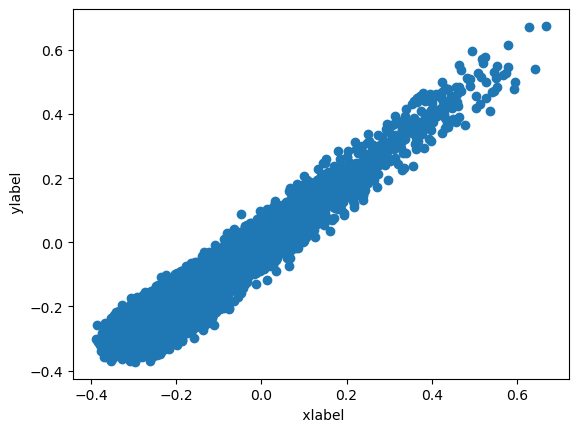

In [111]:
vocab_size = 10000

import matplotlib.pyplot as plt

plt.scatter(embedding_vectors[:, 0], embedding_vectors[:, 1])


plt.xlabel(' xlabel')
plt.ylabel(' ylabel')

plt.show()


## [6.5]

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
from keras.preprocessing.text import Tokenizer

def analogy(word1, word2, word3, embedding_matrix, tokenizer):

    if word1 not in tokenizer.word_index or word2 not in tokenizer.word_index or word3 not in tokenizer.word_index:
        print("One or more words not found in the vocabulary.")
        return None

    index1, index2, index3 = tokenizer.word_index[word1], tokenizer.word_index[word2], tokenizer.word_index[word3]

    analogy_vector = embedding_matrix[index1] - embedding_matrix[index2] + embedding_matrix[index3]

    closest_word_index = np.argmax(cosine_similarity([analogy_vector], embedding_matrix)[0])

    closest_word = [word for word, index in tokenizer.word_index.items() if index == closest_word_index + 1][0]

    return closest_word

# Assuming train_texts is a list of your training texts
train_texts = X_train_best_q_c  # Replace [...] with your actual training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

words_to_test = [('الدم', 'ضغط', 'ارتفاع'), ('الصم', 'الغدد', 'أمراض'), ('والحميدة', 'الخبيثة', 'الأورام')]

for words in words_to_test:
    result = analogy(*words, embedding_vectors, tokenizer)
    print(f"{words[0]} - {words[1]} + {words[2]} = {result}")


الدم - ضغط + ارتفاع = جراحة
الصم - الغدد + أمراض = المفترض
والحميدة - الخبيثة + الأورام = محسوسة


# Question [7]: Deep Neural Network

## [7.1]

### [7.1.1]

In [113]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


In [114]:


def DNN_BoW(X_train, y_train, X_val, y_val, X_test, y_test, comparison_table, name_preprocessing_methods):

    num_classes = len(set(y_train))

    label_mapping = {label: idx for idx, label in enumerate(set(y_train))}
    y_train_numeric = [label_mapping[label] for label in y_train]
    y_val_numeric = [label_mapping[label] for label in y_val]
    y_test_numeric = [label_mapping[label] for label in y_test]

    y_train_one_hot = to_categorical(y_train_numeric, num_classes=num_classes)
    y_val_one_hot = to_categorical(y_val_numeric, num_classes=num_classes)
    y_test_one_hot = to_categorical(y_test_numeric, num_classes=num_classes)

    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Adjust output layer for multi-class

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train_one_hot, epochs=10, batch_size=128)

    y_val_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val_one_hot.argmax(axis=1), y_val_pred.argmax(axis=1))
    print(f'Accuracy on Validation Set: {accuracy}')

    y_test_pred = model.predict(X_test)

    accuracy_test = accuracy_score(y_test_one_hot.argmax(axis=1), y_test_pred.argmax(axis=1))
    print(f'Accuracy on Test Set: {accuracy_test}')

    balanced_accuracy_test = balanced_accuracy_score(y_test_one_hot.argmax(axis=1), y_test_pred.argmax(axis=1))
    print(f'Balanced Accuracy on Test Set: {balanced_accuracy_test}')

    comparison_table['question_step_number'].append("7.1.1")
    comparison_table['model_name'].append(name_preprocessing_methods)
    comparison_table['features'].append('Bag of Words')
    comparison_table['model_parameters'].append('optimizer=adam, loss=categorical_crossentropy, metrics=[accuracy]')
    comparison_table['preprocessing_methods'].append(name_preprocessing_methods)
    comparison_table['accuracy'].append(accuracy_test)
    comparison_table['balance_accuracy'].append(balanced_accuracy_test)

    return comparison_table


In [115]:
print(X_train_bow_best.shape)
print(X_train_bow_best.dtype)

print(X_val_bow_best.shape)
print(X_val_bow_best.dtype)

print(X_test_bow_best.shape)
print(X_test_bow_best.dtype)

(32598, 95400)
int64
(11341, 95400)
int64
(11282, 95400)
int64


In [116]:
import tensorflow as tf
from scipy.sparse import coo_matrix


# Convert X_train_bow_best to COO sparse matrix and reorder
X_train_sparse = coo_matrix(X_train_bow_best.astype(np.float32))
X_train_sparse = tf.sparse.reorder(tf.sparse.SparseTensor(
    indices=np.column_stack((X_train_sparse.row, X_train_sparse.col)),
    values=X_train_sparse.data,
    dense_shape=X_train_sparse.shape
))

# Convert X_val_bow_best to COO sparse matrix and reorder
X_val_sparse = coo_matrix(X_val_bow_best.astype(np.float32))
X_val_sparse = tf.sparse.reorder(tf.sparse.SparseTensor(
    indices=np.column_stack((X_val_sparse.row, X_val_sparse.col)),
    values=X_val_sparse.data,
    dense_shape=X_val_sparse.shape
))

# Convert X_test_bow_best to COO sparse matrix and reorder
X_test_sparse = coo_matrix(X_test_bow_best.astype(np.float32))
X_test_sparse = tf.sparse.reorder(tf.sparse.SparseTensor(
    indices=np.column_stack((X_test_sparse.row, X_test_sparse.col)),
    values=X_test_sparse.data,
    dense_shape=X_test_sparse.shape
))


print(X_train_sparse.shape)
print(X_train_sparse.dtype)

print(X_val_sparse.shape)
print(X_val_sparse.dtype)

print(X_test_sparse.shape)
print(X_test_sparse.dtype)

(32598, 95400)
<dtype: 'float32'>
(11341, 95400)
<dtype: 'float32'>
(11282, 95400)
<dtype: 'float32'>


In [117]:
comparison_table = DNN_BoW(X_train_sparse, y_train,X_val_sparse,y_val, X_test_sparse, y_test, comparison_table,'DNN_BoW')
df = pd.DataFrame(comparison_table)
df

Epoch 1/10
255/255 [==============================] - 156s 603ms/step - loss: 1.1513 - accuracy: 0.7121
Epoch 2/10
255/255 [==============================] - 150s 590ms/step - loss: 0.5267 - accuracy: 0.8217
Epoch 3/10
255/255 [==============================] - 149s 584ms/step - loss: 0.1584 - accuracy: 0.9488
Epoch 4/10
255/255 [==============================] - 147s 578ms/step - loss: 0.0836 - accuracy: 0.9705
Epoch 5/10
255/255 [==============================] - 150s 588ms/step - loss: 0.0708 - accuracy: 0.9732
Epoch 6/10
255/255 [==============================] - 147s 577ms/step - loss: 0.0663 - accuracy: 0.9737
Epoch 7/10
255/255 [==============================] - 148s 581ms/step - loss: 0.0652 - accuracy: 0.9741
Epoch 8/10
255/255 [==============================] - 149s 583ms/step - loss: 0.0638 - accuracy: 0.9746
Epoch 9/10
255/255 [==============================] - 150s 588ms/step - loss: 0.0635 - accuracy: 0.9747
Epoch 10/10
355/355 [==============================] - 2s 6ms/st

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",Orginal Data,0.705283,0.691374
1,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_links,0.704485,0.690185
2,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_doctor_names,0.702358,0.685075
3,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_specialization,0.704485,0.690046
4,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_duplicate_characters,0.704130,0.689616
5,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",convert_indic_digits_to_arabic,0.704308,0.689894
6,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",unify_numbers,0.705637,0.691350
7,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_numbers,0.705549,0.691220
8,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_date_time,0.704662,0.690136
9,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_punctuation,0.704308,0.689907


### [7.1.2]

In [118]:


def DNN_TFIDF(X_train, y_train, X_val, y_val, X_test, y_test, comparison_table, name_preprocessing_methods):



    num_classes = len(set(y_train))

    label_mapping = {label: idx for idx, label in enumerate(set(y_train))}
    y_train_numeric = [label_mapping[label] for label in y_train]
    y_val_numeric = [label_mapping[label] for label in y_val]
    y_test_numeric = [label_mapping[label] for label in y_test]

    y_train_one_hot = to_categorical(y_train_numeric, num_classes=num_classes)
    y_val_one_hot = to_categorical(y_val_numeric, num_classes=num_classes)
    y_test_one_hot = to_categorical(y_test_numeric, num_classes=num_classes)

    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Adjust output layer for multi-class

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train_one_hot, epochs=10, batch_size=256)

    y_val_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val_one_hot.argmax(axis=1), y_val_pred.argmax(axis=1))
    print(f'Accuracy on Validation Set: {accuracy}')

    y_test_pred = model.predict(X_test)

    accuracy_test = accuracy_score(y_test_one_hot.argmax(axis=1), y_test_pred.argmax(axis=1))
    print(f'Accuracy on Test Set: {accuracy_test}')

    balanced_accuracy_test = balanced_accuracy_score(y_test_one_hot.argmax(axis=1), y_test_pred.argmax(axis=1))
    print(f'Balanced Accuracy on Test Set: {balanced_accuracy_test}')

    comparison_table['question_step_number'].append("7.1.2")
    comparison_table['model_name'].append(name_preprocessing_methods)
    comparison_table['features'].append('DNN_TFIDF')
    comparison_table['model_parameters'].append('default')
    comparison_table['preprocessing_methods'].append(name_preprocessing_methods)
    comparison_table['accuracy'].append(accuracy_test)
    comparison_table['balance_accuracy'].append(balanced_accuracy_test)

    return comparison_table


In [119]:

X_train_best_tfidf.sort_indices()
X_val_best_tfidf.sort_indices()
X_test_best_tfidf.sort_indices()


In [120]:
comparison_table = DNN_TFIDF(X_train_best_tfidf, y_train, X_val_best_tfidf, y_val, X_test_best_tfidf, y_test, comparison_table,'DNN with TF-IDF')
df = pd.DataFrame(comparison_table)
df

Epoch 1/10
128/128 [==============================] - 79s 608ms/step - loss: 1.3047 - accuracy: 0.6377
Epoch 2/10
128/128 [==============================] - 76s 597ms/step - loss: 0.6288 - accuracy: 0.8020
Epoch 3/10
128/128 [==============================] - 77s 601ms/step - loss: 0.1953 - accuracy: 0.9388
Epoch 4/10
128/128 [==============================] - 77s 599ms/step - loss: 0.0927 - accuracy: 0.9695
Epoch 5/10
128/128 [==============================] - 76s 597ms/step - loss: 0.0762 - accuracy: 0.9728
Epoch 6/10
128/128 [==============================] - 76s 597ms/step - loss: 0.0719 - accuracy: 0.9736
Epoch 7/10
128/128 [==============================] - 76s 597ms/step - loss: 0.0692 - accuracy: 0.9738
Epoch 8/10
128/128 [==============================] - 77s 603ms/step - loss: 0.0677 - accuracy: 0.9742
Epoch 9/10
128/128 [==============================] - 78s 606ms/step - loss: 0.0671 - accuracy: 0.9745
Epoch 10/10
355/355 [==============================] - 2s 6ms/step
Accura

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",Orginal Data,0.705283,0.691374
1,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_links,0.704485,0.690185
2,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_doctor_names,0.702358,0.685075
3,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_specialization,0.704485,0.690046
4,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_duplicate_characters,0.704130,0.689616
5,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",convert_indic_digits_to_arabic,0.704308,0.689894
6,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",unify_numbers,0.705637,0.691350
7,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_numbers,0.705549,0.691220
8,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_date_time,0.704662,0.690136
9,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_punctuation,0.704308,0.689907


## [7.2]

In [121]:
X_val_best_q_c= X_val_best['question'] +''+ X_val_best['best_cleaned_text']

X_test_best_q_c=X_test_best['question'] +''+ X_test_best['best_cleaned_text']

print(X_train_best_q_c.shape)
print(X_val_best_q_c.shape)
print(X_test_best_q_c.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(embedding_vectors.shape)

(32598,)
(11341,)
(11282,)
(32598,)
(11341,)
(11282,)
(10000, 50)


### [7.2.1]

### [7.2.2]

### [7.2.3]

In [122]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [123]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

def CNN_EMB_without_vectors(X_train, y_train, X_val, y_val, X_test, y_test, comparison_table, name_preprocessing_methods):

    vocab_size = 10000
    max_len = 100

    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(X_train)

    # Transform text data to sequences
    sequences_train = tokenizer.texts_to_sequences(X_train)
    sequences_val = tokenizer.texts_to_sequences(X_val)
    sequences_test = tokenizer.texts_to_sequences(X_test)

    # Pad sequences
    X_train_padded = pad_sequences(sequences_train, maxlen=max_len)
    X_val_padded = pad_sequences(sequences_val, maxlen=max_len)
    X_test_padded = pad_sequences(sequences_test, maxlen=max_len)

    # Build and compile the model
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Flatten())
    model.add(Dense(8, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_padded, y_train, epochs=10, batch_size=32)

    # Predictions on the training set
    y_train_pred = model.predict(X_train_padded)
    y_train_pred_classes = np.argmax(y_train_pred, axis=1)

    # Calculate accuracy and balanced accuracy on the training set
    accuracy_train = accuracy_score(y_train, y_train_pred_classes)
    balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred_classes)

    # Predictions on the validation set
    y_val_pred = model.predict(X_val_padded)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)

    # Calculate accuracy and balanced accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred_classes)
    balanced_accuracy_val = balanced_accuracy_score(y_val, y_val_pred_classes)
    print(f'Accuracy on Validation Set: {accuracy_val}')
    print(f'balanced_accuracy on Validation Set: {balanced_accuracy_val}')


    # Predictions on the test set
    y_test_pred = model.predict(X_test_padded)
    y_test_pred_classes = np.argmax(y_test_pred, axis=1)

    # Calculate accuracy and balanced accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred_classes)
    balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred_classes)
    print(f'Accuracy on Test Set: {accuracy_test}')
    print(f'balanced_accuracy on Test Set: {balanced_accuracy_test}')
    # Update comparison_table
    comparison_table['question_step_number'].append("7.2.3")
    comparison_table['model_name'].append('CNN_EMB_without_vectors')
    comparison_table['features'].append('Embedding layer')
    comparison_table['model_parameters'].append('optimizer=adam, loss=sparse_categorical_crossentropy, metrics=[accuracy]')
    comparison_table['preprocessing_methods'].append('texts_to_sequences')
    comparison_table['accuracy'].append(accuracy_test)
    comparison_table['balance_accuracy'].append(balanced_accuracy_test)

    return comparison_table


In [124]:
y_train = train['clean_label']
y_val = val['clean_label']
y_test = test['clean_label']

label_mapping = {'رفع ضغط لدم': 0, 'جهز نفس': 1, 'ورم خبث حمد': 2, 'سكر': 3, 'جرح عمة': 4, 'جرح عظم': 5, 'لدم': 6, 'غدد صمء': 7}

y_train = y_train.map(label_mapping)
y_val = y_val.map(label_mapping)
y_test = y_test.map(label_mapping)



y_train = y_train.astype(float)
y_val = y_val.astype(float)
y_test = y_test.astype(float)


print(X_train_best_q_c.shape)
print(X_val_best_q_c.shape)
print(X_test_best_q_c.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

print(X_train_best_q_c.dtype)
print(X_val_best_q_c.dtype)
print(X_test_best_q_c.dtype)
print(y_train.dtype)
print(y_test.dtype)
print(y_test.dtype)

(32598,)
(11341,)
(11282,)
(32598,)
(11341,)
(11282,)
object
object
object
float64
float64
float64


In [125]:
comparison_table = CNN_EMB_without_vectors(X_train_best_q_c, y_train, X_val_best_q_c, y_val,X_test_best_q_c, y_test, comparison_table,'CNN_EMB_without_vectors')
df = pd.DataFrame(comparison_table)
df


Epoch 1/10
1019/1019 [==============================] - 14s 12ms/step - loss: 1.1336 - accuracy: 0.7009
Epoch 2/10
1019/1019 [==============================] - 11s 11ms/step - loss: 0.9195 - accuracy: 0.7484
Epoch 3/10
1019/1019 [==============================] - 11s 11ms/step - loss: 0.6659 - accuracy: 0.7889
Epoch 4/10
1019/1019 [==============================] - 11s 11ms/step - loss: 0.3612 - accuracy: 0.8983
Epoch 5/10
1019/1019 [==============================] - 11s 11ms/step - loss: 0.2050 - accuracy: 0.9501
Epoch 6/10
1019/1019 [==============================] - 11s 11ms/step - loss: 0.1533 - accuracy: 0.9658
Epoch 7/10
1019/1019 [==============================] - 11s 11ms/step - loss: 0.1373 - accuracy: 0.9698
Epoch 8/10
1019/1019 [==============================] - 11s 11ms/step - loss: 0.1250 - accuracy: 0.9710
Epoch 9/10
1019/1019 [==============================] - 11s 11ms/step - loss: 0.1187 - accuracy: 0.9714
Epoch 10/10
355/355 [==============================] - 1s 4ms/s

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",Orginal Data,0.705283,0.691374
1,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_links,0.704485,0.690185
2,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_doctor_names,0.702358,0.685075
3,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_specialization,0.704485,0.690046
4,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_duplicate_characters,0.704130,0.689616
5,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",convert_indic_digits_to_arabic,0.704308,0.689894
6,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",unify_numbers,0.705637,0.691350
7,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_numbers,0.705549,0.691220
8,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_date_time,0.704662,0.690136
9,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_punctuation,0.704308,0.689907


### [7.2.4]

## [7.3]

## Extra [7.4]

# Final Results

In [126]:
df = pd.DataFrame(comparison_table)
df

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy
0,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",Orginal Data,0.705283,0.691374
1,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_links,0.704485,0.690185
2,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_doctor_names,0.702358,0.685075
3,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_specialization,0.704485,0.690046
4,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_duplicate_characters,0.704130,0.689616
5,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",convert_indic_digits_to_arabic,0.704308,0.689894
6,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",unify_numbers,0.705637,0.691350
7,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_numbers,0.705549,0.691220
8,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_date_time,0.704662,0.690136
9,5.2,Logistic Regression,none,"multi_class=multinomial, solver=saga",remove_punctuation,0.704308,0.689907


In [127]:
df.to_csv("[كرم الفروان ].csv", index=False)